In [129]:
# Importo i pacchetti necessari
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Importo i dati in csv
Z1_0 = pd.read_csv('dati_plus.csv')
Z1_1 = pd.read_csv('dati_tot.csv')
M1 = pd.read_csv('dati_masse.csv')
T1 = pd.read_csv('dati_osc.csv')

# Porto le misure in metri
Z1_0 = Z1_0 * 1e-2
Z1_1 = Z1_1 * 1e-2

# Definisco le funzioni che mi servono
def mychisq(exp, obs, obsErr):
    return sum(np.power((exp - obs),2)/np.power(obsErr,2))

# Imposto le costanti e le risoluzioni di misura
g = 9.8071
Dmass = 1e-4 # Espresso in kg
Dtime = 1e-2 # Espresso in sec
Dlength = 5e-4 # Espresso in m, riferito all'asta millimetrata

Ho importato nel DataFrame `Z1_0` le misure di Valeria e Sho iniziali di allungamento (dopo poi si fa la media e l'errore sulla media si calcola come $\frac{1}{\sqrt{2}} \sigma^*[z_i]$). Nel DF `Z1_1` ho importato i dati delle misure statiche di allungamento e in `M1` ho due colonne, ovvero il set delle masse e il set delle masse con piattello.

Voglio plottare i dati con il peso sulle ascisse e gli allungamenti sulle ordinate; inoltre voglio trovare il chi quadro del fit rispetto ai dati.

In [130]:
# Metto i dati delle masse e li porto in chilogrammi
m1 = M1['m1'].values * 1e-3
m2 = M1['m2'].values * 1e-3
dmass = Dmass/np.sqrt(12)
p1 = m1 * g
dweight = dmass * g

# Calcolo le medie dei valori iniziali
Z1_0avg = Z1_0.mean(axis=1)
Z1_0var = Z1_0.var(axis=1)
Z1_0err = np.sqrt(1/np.size(Z1_0avg)*Z1_0var + (Dlength/np.sqrt(12)))
#display(Z1_0avg)
#display(Z1_0err)

# Calcolo le medie delle seconde misure
Z1_1avg = Z1_1.mean()
Z1_1var = Z1_1.var()
Z1_1err = np.sqrt(1/np.size(Z1_1avg)*Z1_1var + np.power(Dlength/np.sqrt(12),2))
#display(Z1_1avg)
#display(Z1_1var)
#display(Z1_1err)

# Mostro i dati di delle misure prima e dopo
for i in range(0, 11):
    print('Prima risulta zi%i = ( %.2f +- %.2f ) cm, dopo invece z%i = ( %.4f +- %.4f ) cm' % (i, Z1_0avg.values[i], Z1_0err.values[i], i, Z1_1avg.values[i], Z1_1err.values[i]))

# Calcolo gli allungamenti delle seconde misure
# ATTENZIONE! I DELTA HANNO 10 ELEMENTI NON 11! Non contiamo z0 poiché non è una misura
deltaZ1_1avg = Z1_1avg[0] - Z1_1avg
deltaZ1_1err = np.sqrt(2 * (1/np.size(deltaZ1_1avg)*Z1_1var + np.power(Dlength/np.sqrt(12),2)))
type(deltaZ1_1avg)
deltaZ1_1avg = deltaZ1_1avg.iloc[1:]
deltaZ1_1err = deltaZ1_1err.iloc[1:]

Prima risulta zi0 = ( 0.61 +- 0.01 ) cm, dopo invece z0 = ( 0.6069 +- 0.0002 ) cm
Prima risulta zi1 = ( 0.59 +- 0.01 ) cm, dopo invece z1 = ( 0.5884 +- 0.0002 ) cm
Prima risulta zi2 = ( 0.57 +- 0.01 ) cm, dopo invece z2 = ( 0.5730 +- 0.0002 ) cm
Prima risulta zi3 = ( 0.55 +- 0.01 ) cm, dopo invece z3 = ( 0.5524 +- 0.0002 ) cm
Prima risulta zi4 = ( 0.54 +- 0.01 ) cm, dopo invece z4 = ( 0.5370 +- 0.0001 ) cm
Prima risulta zi5 = ( 0.52 +- 0.01 ) cm, dopo invece z5 = ( 0.5164 +- 0.0002 ) cm
Prima risulta zi6 = ( 0.50 +- 0.01 ) cm, dopo invece z6 = ( 0.4959 +- 0.0002 ) cm
Prima risulta zi7 = ( 0.48 +- 0.01 ) cm, dopo invece z7 = ( 0.4803 +- 0.0002 ) cm
Prima risulta zi8 = ( 0.46 +- 0.01 ) cm, dopo invece z8 = ( 0.4590 +- 0.0001 ) cm
Prima risulta zi9 = ( 0.44 +- 0.01 ) cm, dopo invece z9 = ( 0.4442 +- 0.0005 ) cm
Prima risulta zi10 = ( 0.42 +- 0.01 ) cm, dopo invece z10 = ( 0.4228 +- 0.0002 ) cm


In [131]:
def func(x,m,q):
    return m*x + q

popt,pcov = curve_fit(func, p1[1:], deltaZ1_1avg, sigma=deltaZ1_1err)

plt.errorbar(p1[1:], deltaZ1_1avg, xerr=dweight, yerr=deltaZ1_1err, fmt=' ', marker='.', ms=7, capsize=0)
plt.plot(p1[1:],func(p1[1:], *popt), 'r-')
plt.xlabel('pesi [N]')
plt.ylabel('elongazione [m]')
plt.grid()
sub_axes = plt.axes([.62, .25, .25, .25])
sub_axes.grid()
sub_axes.errorbar(p1[4], deltaZ1_1avg[4], xerr=dweight, yerr=deltaZ1_1err[4], fmt=' ', marker='.', ms=7, capsize=0)
sub_axes.set_xlim([p1[4]-2*dweight, p1[4]+2*dweight])
sub_axes.set_ylim([deltaZ1_1avg[4]-2*deltaZ1_1err[4], deltaZ1_1avg[4]+2*deltaZ1_1err[4]])
plt.show()

# Faccio il test del chi quadro sui quantili 0.1-0.9
chi2k0 = mychisq(func(p1[1:],*popt), deltaZ1_1avg, deltaZ1_1err)
print('Chi quadrato per k modello e k osservato: %f.' % chi2k0 )
if (chi2k0 < stats.chi2.isf(q=0.1, df=8)) & (chi2k0 > (stats.chi2.isf(q=0.9, df=8))):
    print('Test del chi quadro superato!')
else:
    print('Test del chi quadro non superato!')

Chi quadrato per k modello e k osservato: 6.224485.
Test del chi quadro superato!


**Attenzione!!** Il test del chi quadro qua eseguito in realtà è fatto sul modello $y=mx+q$ e non $y=mx$. Fatto sulla legge $y=mx$ i nostri risultati *non* superano il test del chi quadro. Nonostante ciò, con buona approssimazione la legge è lineare. Andrebbe verificata la compatibilità della $k$ computata attraverso il fit lineare con quella calcolata con la media pesata...

In [132]:
# z0 non lo devo considerare
k1 = p1[1:]/deltaZ1_1avg
k1err = k1 * np.sqrt(np.power(dweight/p1[1:],2) + np.power(deltaZ1_1err/deltaZ1_1avg,2))

# Calcolo la media pesata sui valori di k 
wk1 = 1/np.power(k1err, 2)
DeltaWk1 = (sum(wk1)) * (sum(wk1*np.power(p1[1:],2))) - np.power(sum(wk1*p1[1:]),2)
k0err = 1/np.sqrt(sum(wk1))
k0 = np.average(k1, weights = wk1)
print('Il valore di k calcolato con la media pesata è (%.3f +- %.3f ) N/m.' % (k0, k0err))

# Calcolo invece k a partire dalla regressione lineare
k0_1 = 1/popt[0]
k0_1errM = np.sqrt(sum(wk1*np.power(p1[1:],2)/DeltaWk1))
k0_1errQ = np.sqrt(sum(wk1) / DeltaWk1)
print('Il valore di k calcolato con la regressione lineare è (%.3f +- %.3f) N/m.' % (k0_1, k0_1errM))

Il valore di k calcolato con la media pesata è (9.705 +- 0.007 ) N/m.
Il valore di k calcolato con la regressione lineare è (9.513 +- 0.025) N/m.


In [133]:
# Plot dei residui tra fit e dati
r1 = abs(func(p1[1:],*popt) - deltaZ1_1avg)
#display(r1)
fig2 = plt.figure()
plt.title('Grafico dei residui')
plt.errorbar(p1[1:], r1, fmt=' ', marker='.', ms=7, capsize=0)
plt.show()

print('L\'intercetta del fit è (%.2f +- %.2f) m' % (popt[1], k0_1errQ))

L'intercetta del fit è (-0.00 +- 0.02) m


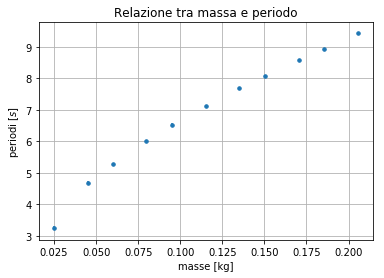

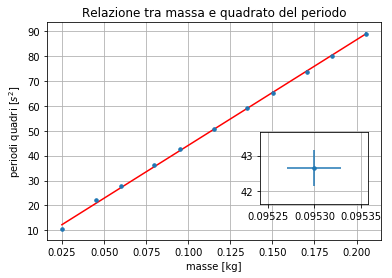

Scelgo di non dare falso allarme per sottostima di incertezze... (è giusto?), quindi sclego i quantili 0 e 0.8
Chi quadrato per k modello e k osservato: 6.224485.
Test del chi quadro superato!


In [157]:
# Ora studio la relazione tra massa e periodo
T1
T1_0 = T1.iloc[:,[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
T1_0avg = T1_0.mean()
T1_0var = T1_0.var()
T1_0err = np.sqrt(T1_0var + np.power(Dtime/np.sqrt(12),2))

# Plotto i dati con masse sulle ascisse e periodi sulle ordinate
fig3 = plt.figure()
plt.title('Relazione tra massa e periodo')
plt.grid()
plt.xlabel('masse [kg]')
plt.ylabel('periodi [$s$]')
plt.errorbar(m2,T1_0avg, xerr=dmass, yerr=T1_0err, fmt=' ', marker='.', ms=7, capsize=0)
plt.show()

# Ooops! Un grafico di una radice, che strano, proviamo ad elevare al quadrato...
T1_qavg = np.power(T1_0avg, 2)
T1_qerr = 2 * T1_0avg * T1_0err
popt1,pcov1 = curve_fit(func, m2, T1_qavg, sigma=T1_qerr)
fig4 = plt.figure()
plt.title('Relazione tra massa e quadrato del periodo')
plt.errorbar(m2, T1_qavg, xerr=dmass, yerr=T1_qerr, fmt=' ', marker='.', ms=7, capsize=0)
plt.plot(m2,func(m2, *popt1), 'r-')
plt.xlabel('masse [kg]')
plt.ylabel('periodi quadri [$s^2$]')
plt.grid()
sub_axes1 = plt.axes([.62, .25, .25, .25])
sub_axes1.grid()
sub_axes1.errorbar(m2[4], T1_qavg[4], xerr=dmass, yerr=T1_qerr[4], fmt=' ', marker='.', ms=7, capsize=0)
sub_axes1.set_xlim([m2[4]-2*dmass, m2[4]+2*dmass])
sub_axes1.set_ylim([T1_qavg[4]-2*T1_qerr[4], T1_qavg[4]+2*T1_qerr[4]])
plt.show()

# Faccio il test del chi quadro sui quantili 0-0.8
print('Scelgo di non dare falso allarme per sottostima di incertezze... (è giusto?), quindi sclego i quantili 0 e 0.8')
chi2c0 = mychisq(func(m2,*popt1), T1_qavg, T1_qerr)
print('Chi quadrato per k modello e k osservato: %f.' % chi2k0 )
if (chi2c0 < stats.chi2.isf(q=0, df=9)) & (chi2k0 > (stats.chi2.isf(q=0.8, df=9))):
    print('Test del chi quadro superato!')
else:
    print('Test del chi quadro non superato!')

A questo punto ci manca da calcolare la massa efficace della molla (basta trovare il q della regressione, che è `popt[1]` se non vado errato) e modificare la equazione della relazione con la massa $M = m + m_e$. Inoltre vanno calcolate $C$ e $M_e$ delle misure dinamiche con la regressione lineare come indicato nel punto 2.4.12 della scheda. Conoscendo la legge, possiamo poi imporre $C=2\pi$ e trovare il valore di $k$. I valori di $k$ statico e dinamico sono compatibili?